### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# function to calculate coupon acceptance rate of a given dataframe
def get_acceptance_rate(data):
    return (data[data['Y'] == 1].shape[0] / data.shape[0]) * 100.0

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [6]:
# checking for null values
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [7]:
# checking all unique values for each column
data.apply(lambda col: col.unique())

destination                                 [No Urgent Place, Home, Work]
passanger                             [Alone, Friend(s), Kid(s), Partner]
weather                                             [Sunny, Rainy, Snowy]
temperature                                                  [55, 80, 30]
time                                          [2PM, 10AM, 6PM, 7AM, 10PM]
coupon                  [Restaurant(<20), Coffee House, Carry out & Ta...
expiration                                                       [1d, 2h]
gender                                                     [Female, Male]
age                             [21, 46, 26, 31, 41, 50plus, 36, below21]
maritalStatus           [Unmarried partner, Single, Married partner, D...
has_children                                                       [1, 0]
education               [Some college - no degree, Bachelors degree, A...
occupation              [Unemployed, Architecture & Engineering, Stude...
income                  [$37500 - $499

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
# replacing all null values with an N/A string, since we don't wanna remove entire rows
data = data.fillna('N/A')

In [9]:
# checking that all null values are gone
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 



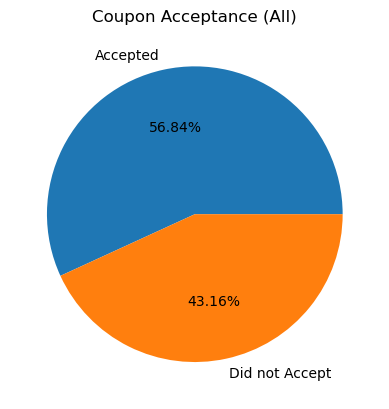

In [10]:
# calculating percent of total observations who accepted the coupon.
percent = get_acceptance_rate(data)

# plotting pie chart
plt.pie([percent, 100.0 - percent], labels=['Accepted', 'Did not Accept'], autopct='%.2f%%') 
plt.title('Coupon Acceptance (All)')
plt.savefig('images/fig1.png')
plt.show() 

5. Use a bar plot to visualize the `coupon` column.

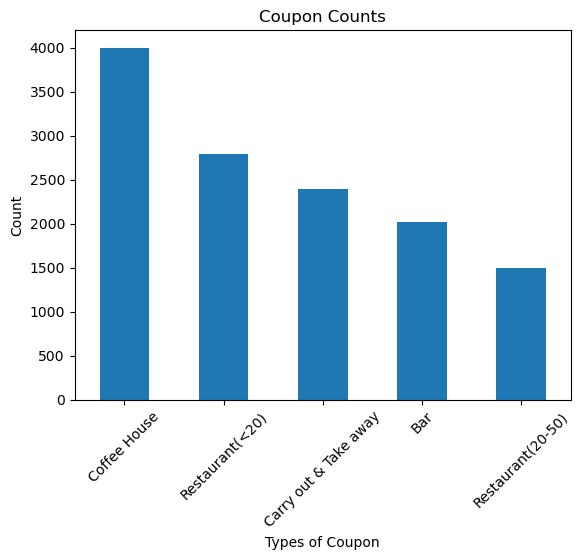

In [11]:
# plotting all coupon values in a bar plot.
data['coupon'].value_counts().plot(kind = 'bar')
plt.xlabel('Types of Coupon')
plt.ylabel('Count')
plt.title('Coupon Counts')
plt.xticks(rotation=45)
plt.savefig('images/fig2.png')
plt.show()

6. Use a histogram to visualize the temperature column.

C:\Users\brady\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


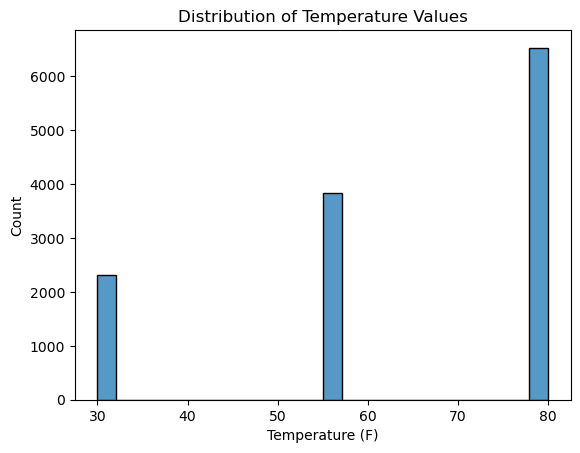

In [12]:
sns.histplot(data=data, x='temperature')
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.title('Distribution of Temperature Values')
plt.savefig('images/fig3.png')
plt.show()

C:\Users\brady\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


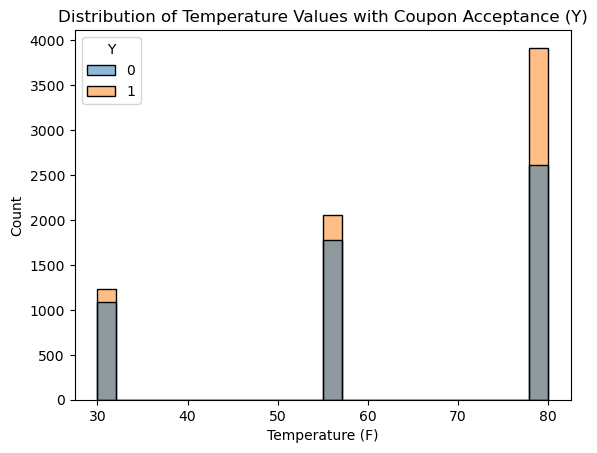

In [13]:
sns.histplot(data=data, x='temperature', hue='Y')
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.title('Distribution of Temperature Values with Coupon Acceptance (Y)')
plt.savefig('images/fig4.png')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
# getting all rows with Bar coupons
bar_data = data[data['coupon'] == 'Bar']

In [15]:
bar_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,N/A,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,N/A,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,N/A,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


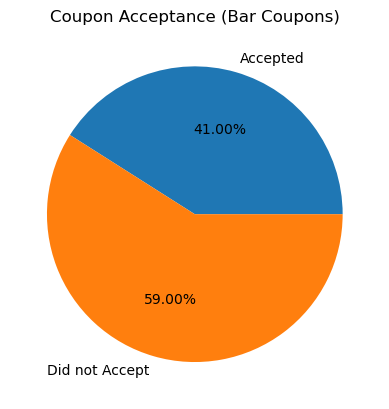

In [16]:
# calculating proportion of accepted bar coupons
percent = get_acceptance_rate(bar_data)

# plotting pie chart
plt.pie([percent, 100.0 - percent], labels=['Accepted', 'Did not Accept'], autopct='%.2f%%') 
plt.title('Coupon Acceptance (Bar Coupons)')
plt.savefig('images/fig5.png')
plt.show() 

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [17]:
# data filters
three_fewer = ['never', 'less1', '1~3']
four_more = ['4~8', 'gt8']

# getting group specific rows
bar_3_fewer = bar_data[bar_data['Bar'].isin(three_fewer)]
bar_more = bar_data[bar_data['Bar'].isin(four_more)]

In [18]:
# calculating acceptance rate for each group
percent1 = get_acceptance_rate(bar_3_fewer)
percent2 = get_acceptance_rate(bar_more)

C:\Users\brady\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


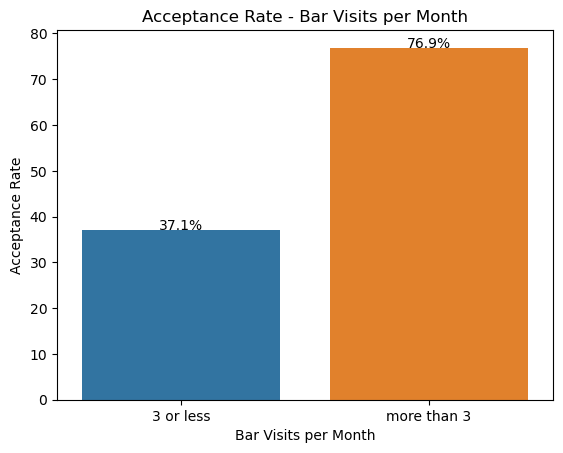

In [19]:
# saving percents for plotting
percents = [percent1, percent2]

# plotting percentages in bar plot with labels
ax = sns.barplot(x=['3 or less', 'more than 3'], y=percents)
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percents[i]), (x, y), ha='center')
plt.xlabel('Bar Visits per Month')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate - Bar Visits per Month')
plt.savefig('images/fig6.png')
plt.show()

Drivers who go to bars more than 3 times a month were really likely to accept the coupon.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [20]:
# data filters
one_more = ['1~3', '4~8', 'gt8']
age_25_more = ['26', '31', '36', '41', '46', '50plus']

# getting group specific rows
bar_1_more_25_over = bar_data[(bar_data['Bar'].isin(one_more)) & (bar_data['age'].isin(age_25_more))]
bar_others = bar_data[(~bar_data['Bar'].isin(one_more)) & (~bar_data['age'].isin(age_25_more))]

In [21]:
# calculating acceptance rate for each group
percent1 = get_acceptance_rate(bar_1_more_25_over)
percent2 = get_acceptance_rate(bar_others)

C:\Users\brady\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


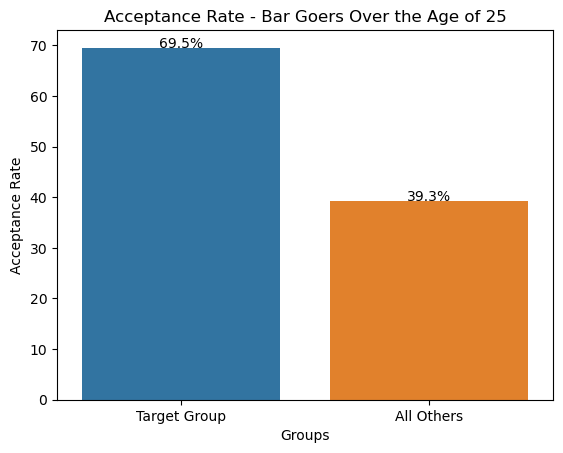

In [22]:
# saving percents for plotting
percents = [percent1, percent2]

# plotting percentages in bar plot with labels
ax = sns.barplot(x=['Target Group', 'All Others'], y=percents)
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percents[i]), (x, y), ha='center')
plt.xlabel('Groups')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate - Bar Goers Over the Age of 25')
plt.savefig('images/fig7.png')
plt.show()


Drivers who are over 25 years old and frequent bars are more likely to accept the bar coupon than others.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [23]:
# getting group specific rows
bar_1m_nok_nof = bar_data[(bar_data['Bar'].isin(one_more)) & (bar_data['passanger'] != 'Kid(s)') & (bar_data['occupation'] != 'Farming Fishing & Forestry')]
bar_others2 = bar_data[(~bar_data['Bar'].isin(one_more)) & (bar_data['passanger'] == 'Kid(s)') & (bar_data['occupation'] == 'Farming Fishing & Forestry')]


In [24]:
# calculating acceptance rate for each group
percent1 = get_acceptance_rate(bar_1m_nok_nof)
percent2 = get_acceptance_rate(bar_others2)

71.32486388384754
33.33333333333333


C:\Users\brady\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


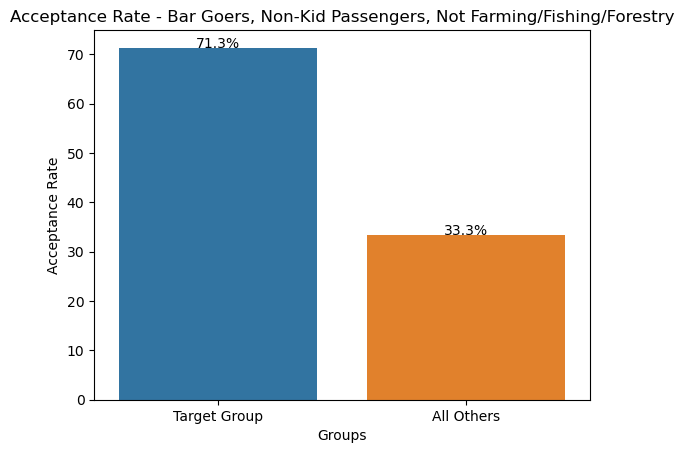

In [25]:
# saving percents for plotting
percents = [percent1, percent2]

# plotting percentages in bar plot with labels
ax = sns.barplot(x=['Target Group', 'All Others'], y=percents)
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percents[i]), (x, y), ha='center')
plt.xlabel('Groups')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate - Bar Goers, Non-Kid Passengers, Not Farming/Fishing/Forestry')
plt.savefig('images/fig8.png')
plt.show()

This target group is more likely to accept the bar coupon than the rest of the drivers.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [26]:
# data filters
under_30 = ['21', '26', 'below21']
more_4 = ['4~8', 'gt8']
less_50 = ['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500']

# getting group specific rows
bar_1m_nok_wid = bar_data[(bar_data['Bar'].isin(one_more)) & (bar_data['passanger'] != 'Kid(s)') & (bar_data['maritalStatus'] != 'Widowed')]
bar_1m_under30 = bar_data[(bar_data['Bar'].isin(one_more)) & (bar_data['age'].isin(under_30))]
bar_cheap_50less = bar_data[(bar_data['RestaurantLessThan20'].isin(more_4)) & (bar_data['income'].isin(less_50))]

In [27]:
# calculating acceptance rate for each group
percent1 = get_acceptance_rate(bar_1m_nok_wid)
percent2 = get_acceptance_rate(bar_1m_under30)
percent3 = get_acceptance_rate(bar_cheap_50less)

71.32486388384754
72.17391304347827
45.348837209302324


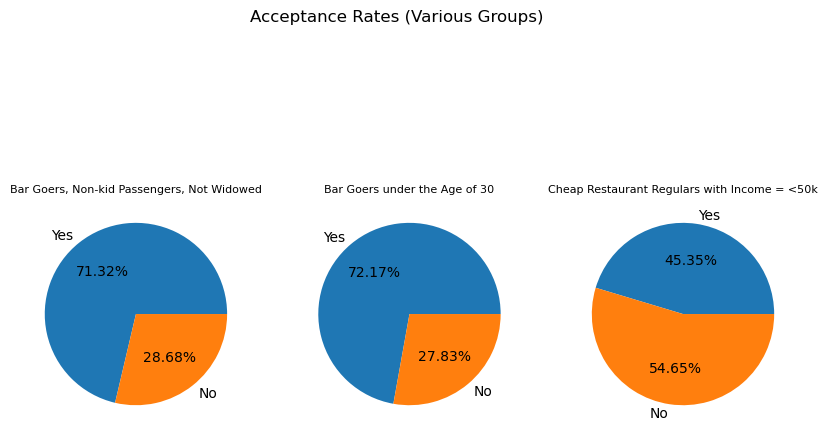

In [28]:
# saving percents for plotting
percents = [percent1, percent2, percent3]

plt.figure(figsize=(10,10))
# plotting multiple pie charts in one plot
ax1 = plt.subplot2grid((1, 3), (0, 0))
plt.suptitle('Acceptance Rates (Various Groups)', y=0.8)
plt.pie([percent1, 100.0 - percent1], labels=['Yes', 'No'], autopct='%.2f%%')
plt.title('Bar Goers, Non-kid Passengers, Not Widowed', fontsize=8)

ax1 = plt.subplot2grid((1, 3), (0, 1))
plt.pie([percent2, 100.0 - percent2], labels=['Yes', 'No'], autopct='%.2f%%') 
plt.title('Bar Goers under the Age of 30', fontsize=8)

ax1 = plt.subplot2grid((1, 3), (0, 2))
plt.pie([percent3, 100.0 - percent3], labels=['Yes', 'No'], autopct='%.2f%%') 
plt.title('Cheap Restaurant Regulars with Income = <50k', fontsize=8)
plt.savefig('images/fig9.png')
plt.show()

Drivers who go to bars more than once a month are the common factor between the two high acceptance rate control groups in this plot.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Unsurprisingly, I would hypothesize that a driver is more likely to accept a bar coupon the more times they go to a bar per month.

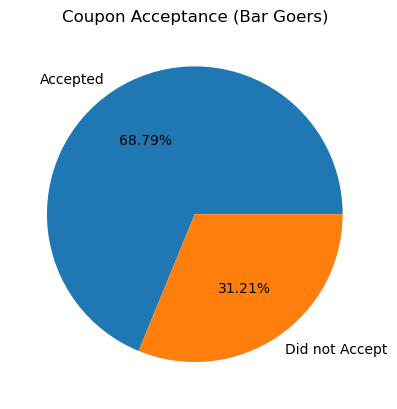

In [29]:
# getting specific group rows
bar_hyp = bar_data[bar_data['Bar'].isin(one_more)]

# calculating acceptance rate
percent = get_acceptance_rate(bar_hyp)

# plotting pie chart
plt.pie([percent, 100.0 - percent], labels=['Accepted', 'Did not Accept'], autopct='%.2f%%') 
plt.title('Coupon Acceptance (Bar Goers)')
plt.savefig('images/fig10.png')
plt.show() 

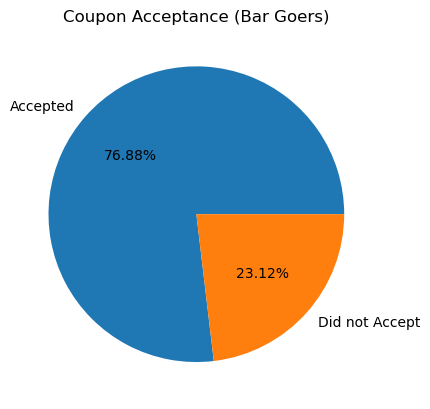

In [30]:
# getting specific group rows
bar_hyp = bar_data[bar_data['Bar'].isin(four_more)]

# calculating acceptance rate
percent = get_acceptance_rate(bar_hyp)

# plotting pie chart
plt.pie([percent, 100.0 - percent], labels=['Accepted', 'Did not Accept'], autopct='%.2f%%') 
plt.title('Coupon Acceptance (Bar Goers)')
plt.savefig('images/fig11.png')
plt.show() 

These pie charts reflect the truth of the hypothesis. The acceptance rate increases the more times drivers go to a bar each month.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# Carry out & Take away Coupons




In [31]:
# getting all rows with Carry out & Take away coupons
takeout_data = data[data['coupon'] == 'Carry out & Take away']

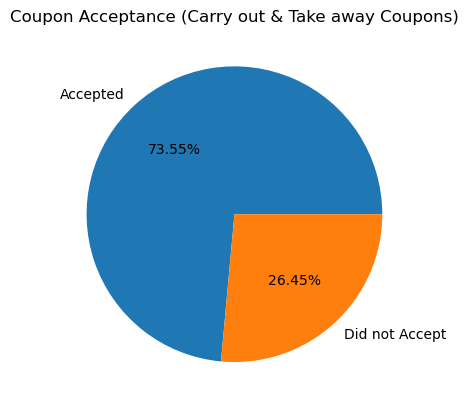

In [32]:
# calculating proportion of accepted Carry out coupons
percent = get_acceptance_rate(takeout_data)

# plotting pie chart
plt.pie([percent, 100.0 - percent], labels=['Accepted', 'Did not Accept'], autopct='%.2f%%') 
plt.title('Coupon Acceptance (Carry out & Take away Coupons)')
plt.savefig('images/fig12.png')
plt.show() 

Really high acceptance rate compared to Bar Coupons.

### Unemployed/Students vs. Employed


One would assume Unemployed/Student drivers eat more takeout than the average driver.

In [33]:
# getting group specific rows
unemployed_students = takeout_data[(takeout_data['occupation'] == 'Unemployed') | (takeout_data['occupation'] == 'Student')]
employed = takeout_data[(takeout_data['occupation'] != 'Unemployed') & (takeout_data['occupation'] != 'Student')]

In [34]:
# calculating acceptance rate for each group
percent1 = get_acceptance_rate(unemployed_students)
percent2 = get_acceptance_rate(employed)

C:\Users\brady\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


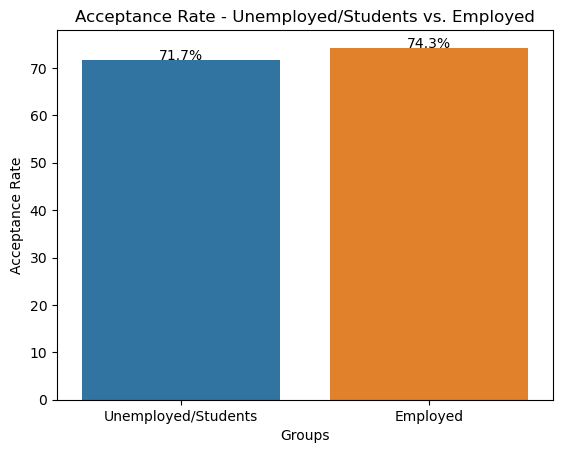

In [35]:
# saving percents for plotting
percents = [percent1, percent2]

# plotting percentages in bar plot with labels
ax = sns.barplot(x=['Unemployed/Students', 'Employed'], y=percents)
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percents[i]), (x, y), ha='center')
plt.xlabel('Groups')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate - Unemployed/Students vs. Employed')
plt.savefig('images/fig13.png')
plt.show()

That doesn't seem to be the case.

### Takeout Visit Frequency

Let's see if this heavily affects acceptance rate like in the bar coupons.

In [46]:
# data filters
one_more = ['1~3', '4~8', 'gt8']

# getting group specific rows
carry_goers = takeout_data[takeout_data['CarryAway'].isin(one_more)]
no_carry = takeout_data[~takeout_data['CarryAway'].isin(one_more)]

In [47]:
# calculating acceptance rate for each group
percent1 = get_acceptance_rate(carry_goers)
percent2 = get_acceptance_rate(no_carry)

74.37059415911381
69.53316953316954


C:\Users\brady\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


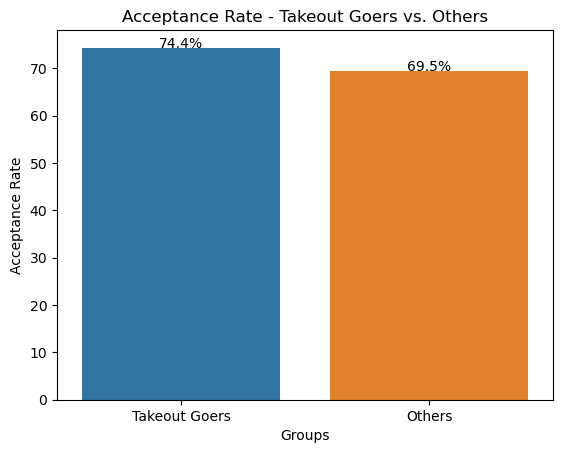

In [48]:
# saving percents for plotting
percents = [percent1, percent2]

# plotting percentages in bar plot with labels
ax = sns.barplot(x=['Takeout Goers', 'Others'], y=percents)
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percents[i]), (x, y), ha='center')
plt.xlabel('Groups')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate - Takeout Goers vs. Others')
plt.savefig('images/fig14.png')
plt.show()

Drivers who frequent takeouts have a higher acceptance rate than those who don't, but not by much.

### Income

In theory, lower income drivers would prefer takeout coupons. We'll compare those with an income of 25k or less to others.

In [39]:
# data filters
less_50 = ['$12500 - $24999', 'Less than $12500']

# getting group specific rows
carry_less50 = takeout_data[takeout_data['income'].isin(less_50)]
carry_50more = takeout_data[~takeout_data['income'].isin(less_50)]

In [40]:
carry_less50['income'].unique()

array(['$12500 - $24999', 'Less than $12500'], dtype=object)

In [41]:
# calculating acceptance rate for each group
percent1 = get_acceptance_rate(carry_less50)
percent2 = get_acceptance_rate(carry_50more)
print(percent1)
print(percent2)

75.17985611510791
73.05389221556887


C:\Users\brady\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


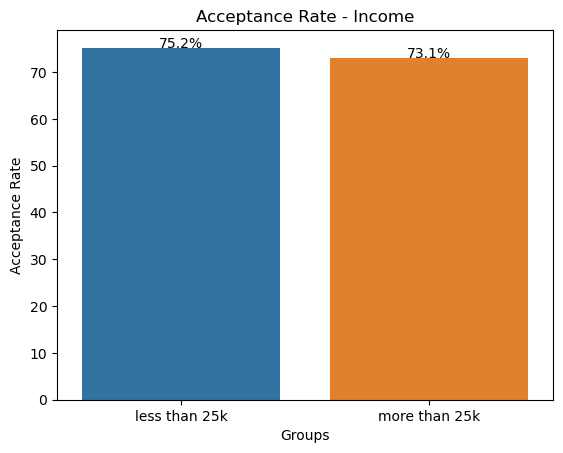

In [42]:
# saving percents for plotting
percents = [percent1, percent2]

# plotting percentages in bar plot with labels
ax = sns.barplot(x=['less than 25k', 'more than 25k'], y=percents)
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percents[i]), (x, y), ha='center')
plt.xlabel('Groups')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate - Income')
plt.savefig('images/fig15.png')
plt.show()

Once again, this didn't result in a high difference in acceptance rate.

### CarryAway Coupon Hypothesis

Acceptance rate seems to be really high regardless of the conditions applied to the drivers we're looking at. This seems to indicate that drivers are really likely to accept takeout coupons, regardless of most circunstances. Let's check if this coupon category is the most accepted one:

In [43]:
# getting remaining coupon dataframes
res20_data = data[data['coupon'] == 'Restaurant(<20)']
res50_data = data[data['coupon'] == 'Restaurant(20-50)']
coffee_data = data[data['coupon'] == 'Coffee House']

In [44]:
# calculating acceptance rates for all coupon groups
percent1 = get_acceptance_rate(bar_data)
percent2 = get_acceptance_rate(takeout_data)
percent3 = get_acceptance_rate(res20_data)
percent4 = get_acceptance_rate(res50_data)
percent5 = get_acceptance_rate(coffee_data)

C:\Users\brady\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


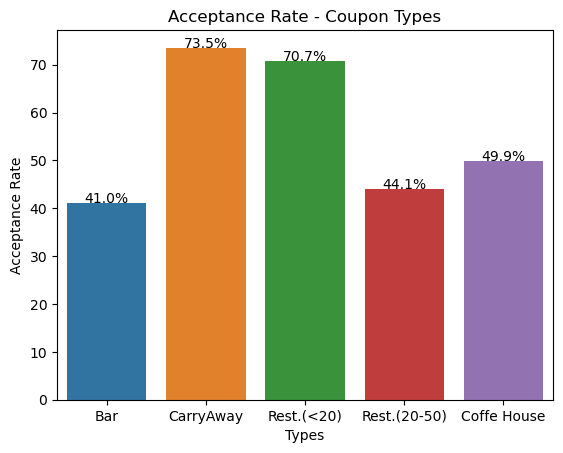

In [45]:
# saving percents for plotting
percents = [percent1, percent2, percent3, percent4, percent5]
labels = ['Bar', 'CarryAway', 'Rest.(<20)', 'Rest.(20-50)','Coffe House']
# plotting percentages in bar plot with labels
ax = sns.barplot(x=labels, y=percents)
patches = ax.patches
for i in range(len(patches)):
   x = patches[i].get_x() + patches[i].get_width()/2
   y = patches[i].get_height()+.05
   ax.annotate('{:.1f}%'.format(percents[i]), (x, y), ha='center')
plt.xlabel('Types')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate - Coupon Types')
plt.savefig('images/fig16.png')
plt.show()

Just as expected, CarryAway coupons are the most accepted type of coupons. Cheap restaurant coupons are closely second in acceptance rate, so this seems to indicate that cheaper food coupons are the most attractive to drivers, regardless of their conditions.